# Verslag

In de code is de forward euler methode gebruikt om de verloop van zoutconcentraties te berekenen door de tijd heen. Er zijn 2 tanks gegeven waar niet alleen zout met water in en uit komen, maar in elkaar gieten. Dit betekent dus dat we per stap moeten weten wat de concentratie aan zout is per tank zodat we weten hoeveel zout eruit gaat in de volgende stap. 

We gebruiken dus de formule: zout(kg) delen door volume water (L). De uitkomst van deze formule vermenigvuldigen we dan met hoeveel liter er per stap uit/in stroomt. Deze berekening gebruikten we samen met de Forward Euler Methode om per stap de volgende hoeveelheid te berekenen.

In de code is te zien dat er inspiratie is genomen van het SIER model. Het gebruikt van tanken is immers met elkaar te vergelijken. We weten dat als er een bepaalde hoeveelheid zout uit een tank naar een ander gaat, dat diezelfde hoeveelheid dus in de ander komt. Vandaar dat een berekening in een variable wordt gestopt en soms meerdere malen voor beiden tanken dan wordt gebruikt.

In de grafiek zien we dat tank A snel omhoog gaat. Dit komt omdat er een vast hoeveelheid zout in komt, maar wat eruit gaat gebaseerd is op hoeveel zout er al in zit. Daarom, als er uiteindelijk steeds meer zout in zit, gaat er steeds meer zout uit. Op een gegeven moment is de zoutconcentratie bijna 0.2 kg per liter. Dan gaat er 7 liter water uit tank A met 0.2 kg/L, maar er gaat ook 7 liter water in met 0.2/L (een deel van tank B, maar dat wordt uiteindelijk ook ongeveer 0.2kg/L). Dus het blijft dan evenveel.

Bij tank B zien we dat het eerst daalt en dat het weer omhoog gaat net nadat het de grafiek van tank A kruist. Dit komt omdat al het zout tank tank B krijgt gebaseerd is op wat tank A geeft. Dus wanneer tank A begint met 0 kg zout zal tank B alleen maar zout verliesen. Zodra de concentratie van beide tanken hetzelfde is betekent het dat er vanuit tank A evenveel zout gaat geven als dat tank B verliest. Uiteindelijk zal tank A zoals hiervoor besproken zelfs meer krijgen tot aan 0.2 kg/L, dat er weer voor zorgt dat tank B's zoutconcentratie terug omhoog gaat. Omdat tank A noot hoger komt dan 0.2kg/L zal tank B daar ook stoppen met groeien.

Met de slider onder de grafiek kan je de step size aanpassen.

<IPython.core.display.Javascript object>


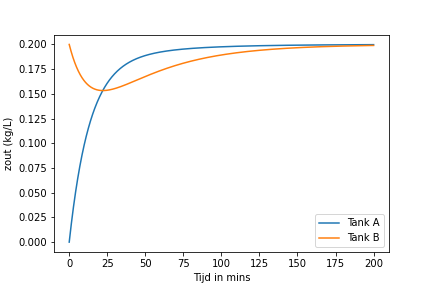

interactive(children=(FloatSlider(value=0.2, description='step_size', max=30.0, min=0.1), Output()), _dom_clas…

In [320]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

def zouttank(h=0.5):
    num_steps = int(200/h)
    times = h * np.array(range(num_steps + 1))
    
    zc_tank1 = np.zeros(num_steps + 1) # Zoutconecentratie tank 1 (kg/L)
    zc_tank2 = np.zeros(num_steps + 1) # Zoutconecentratie tank 2 (kg/L)
    
    zc_tank1[0] = 0. # kg/L
    zc_tank2[0] = 0.2 # kg/L

    for step in range(num_steps):
        to_t1 = (0.2 * 6) / 100
        t1_to_t2 = (zc_tank1[step] * 3) / 100
        t2_to_t1 = (zc_tank2[step] * 1) / 100
        out_t1 = (zc_tank1[step] * 4) / 100
        out_t2 = (zc_tank2[step]*2) / 100
        
        zc_tank1[step + 1] = zc_tank1[step] + h * (to_t1 + t2_to_t1 - t1_to_t2 - out_t1)
        zc_tank2[step + 1] = zc_tank2[step] + h * (t1_to_t2 - t2_to_t1 - out_t2)
        
    return zc_tank1, zc_tank2, times


fig = matplotlib.pyplot.figure("Zout Gehalte")
ax = fig.add_subplot(1, 1, 1)

def update(step_size):
    zc_tank1, zc_tank2, times = zouttank(step_size)

    ax.clear()
    ax.set_xlabel('Tijd in mins')
    ax.set_ylabel('zout (kg/L)')
    ax.plot(times, zc_tank1, label='Tank 1')
    ax.plot(times, zc_tank2, label='Tank 2')
    matplotlib.pyplot.legend(('Tank A', 'Tank B'))

# bron: https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html#Widget-abbreviations
interact(update,step_size=widgets.FloatSlider(min=0.1, max=30, step=0.1, value=0.2));
